C:\Users\VivoBook\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 110 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/25


C:\Users\VivoBook\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  4/250 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - accuracy: 0.5247 - loss: 0.8366

c:\Program Files\Python312\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5362 - loss: 0.8515 - val_accuracy: 0.4375 - val_loss: 0.7663
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5354 - loss: 0.7039 - val_accuracy: 0.7500 - val_loss: 0.6793
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6464 - loss: 0.6740 - val_accuracy: 0.8125 - val_loss: 0.6708
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7541 - loss: 0.6527 - val_accuracy: 0.8750 - val_loss: 0.6371
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7634 - loss: 0.6067 - val_accuracy: 0.6250 - val_loss: 0.6061
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7813 - loss: 0.5422 - val_accuracy: 0.7500 - val_loss: 0.5342
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.7457 - loss: 0.5121 - val_accuracy: 0.6250 - val_loss: 0.5676
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7458 - loss: 0.5206 - val_accuracy: 0.7500 - va

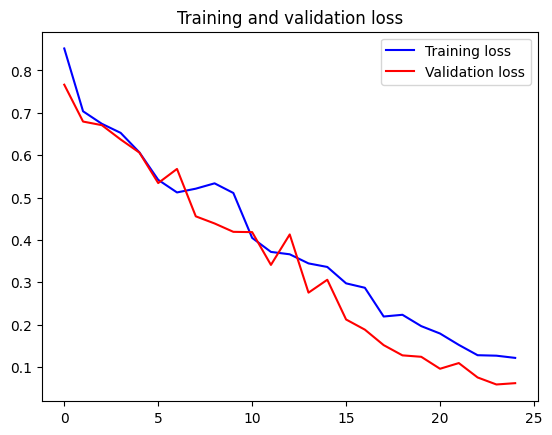

In [1]:
# # Part 1 - Building the CNN
#
# ## Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
# ## Initialising the CNN
classifier = Sequential()
# ## Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
# ## Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# ## Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# ## Step 3 - Flattening
classifier.add(Flatten())

# ## Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# ## Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics =
['accuracy'])
# # Part 2 - Fitting the CNN to the images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
 shear_range = 0.2,
 zoom_range = 0.2,
 horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('dataset/training_set',
 target_size = (64, 64),
 batch_size = 32,
 class_mode = 'binary')
test_set = test_datagen.flow_from_directory('dataset/test_set',
 target_size = (64, 64),
 batch_size = 32,
 class_mode = 'binary')

# Fit the model
# In the tensorflow 2 and upper “fit_generator” is deprecated and replaced by “fit”
history = classifier.fit(training_set,
 steps_per_epoch = 8000//32,
 epochs = 25,
 validation_data = test_set,
 validation_steps = 2000//32)
# # Part 3 - Plotting the tarining and validation loss
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [2]:
# # Part 4 - Making new predictions
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size
= (64, 64))

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
    
print (prediction)

test_image = image.load_img('dataset/single_prediction/cat_or_dog_2.jpg', target_size
= (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print (prediction) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 841ms/step
dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
dog


The graph shows the training loss (in blue) and validation loss (in red) of the CNN model on the training and validation data for the task of classifying images of cats and dogs.

Initially, both the training and validation losses are high, which is expected. However, as the training progresses through the epochs, the loss curves gradually decrease, indicating that the model is learning to better classify the images.

Toward the end of the training (around epoch 20), we can observe that the validation loss starts to slightly increase, while the training loss continues to decrease. This could be an indication of slight overfitting, where the model starts to fit the training data too well at the expense of its ability to generalize to the validation data.

Nevertheless, the gap between the two curves remains relatively small, suggesting that the model has been able to learn relevant features for classifying cat and dog images, without excessive overfitting.

The CNN model seems to train well on the provided data, with a progressive decrease in training and validation losses. Despite a slight sign of overfitting towards the end, the overall performance appears satisfactory for the task of classifying cat and dog images. However, a more in-depth analysis of evaluation metrics (such as accuracy and recall) would be necessary for a definitive conclusion.